## Introduction

In this note we would like to explain two concepts.
* What it means to build and train a model.
* What __Linear Regression__ is. 

For now, let us tell you that in order to __build and train a model__ we do the following five steps:
1. Prepare data.
2. Split data into train and test.
3. Build a model.
4. Fit the model to train data.
5. Evaluate model on test data.

But before we get there we will first:
* take a closer look at our data, 
* we explain how to train linear regression, 
* we define metrics that are used to evaluate the model,
* then discuss why we need split data.

## Diabetes dataset

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn import datasets, linear_model

In [2]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

In [3]:
diabetes = datasets.load_diabetes()

This dataset contains:
1. __Objective__ or __respond__: a quantitative measure of disease progression one year after baseline. 
2. __Features__ that are used to predict. Those are 10 variables: 
    * age, 
    * sex, 
    * body mass index, 
    * average blood pressure, 
    * six blood serum measurements.
    
__Warning__ Features are _standarized_. We will explain what exactly it means another time. Shortly it means that they are rescaled to have mean equal to zero and standard variation equal to 1. That is why, for example, `body mass index` can be negative.

You can get more info about data by calling `diabetes.DESCR`.

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

## Problem

__Main Question__ Can we predict disease progression based on body mass index?

Wwe will try to answer this in here. For that we need to build a model the will do this for us.


## Prepare data

So let's start with preparing data. In order to answer __Main Question__, we will consider only the third column of this dataset, that is `Body mass index`. Let's save this column as `X` dataset. Variables in dataset $X$ are often called __features__ or __exploratory variables__.

In [5]:
X = diabetes.data[:, [2]]

Our variable that we want to predict is stored in `diabetes.target`. Let's save it as `y`. This variable is often call __objective variable__ or __dependent variable__.

In [6]:
y = diabetes.target

Now let's plot them.

Text(0, 0.5, 'Disease progression')

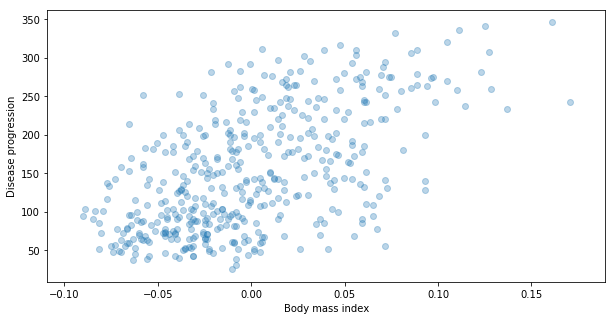

In [7]:
plt.scatter(X[:,0], y, alpha=0.3)
plt.xlabel("Body mass index")
plt.ylabel("Disease progression")

__Note__ It is common in python to call the value that we want to predict by `y`. On the other hand, the dataset of features used to predict `y` is usually called `X`. It is kind on bad to use a name that start by capital letter as a name of variable not classes. However, since in `sklearn` package, this dataset needs to have dimension equal to 2 (like matrix) it became very popular to use capital letter for it.

## Build the model

Now let's us skip directly to buildnig the model. Here is again very simple. We will use a model from `sklearn` library.

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

__Linear Regression__ is a method that tries to find a linear function that best approximate data. This means that we try to find $a$ and $b$ such that $\hat{Y}$ given by the formula

$$\hat{Y} = a X + b$$

is as close to our objective $Y$ as possible.

Later we will explain what it means to __be close__, but now we will train it.

## Fit model to train data.

As we said __traing model__ (or __fitting a model to data__) meant to adjust parameters of the model in a way that it output was as close as possible to real data. 

With `sklearn` it is done by calling `fit` method.

In [9]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## How good is the model 

Now let's compare predicted values to the real one.

Text(0, 0.5, 'Disease progression')

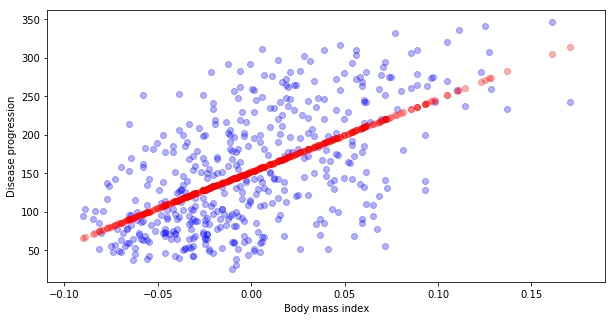

In [10]:
# Calculate predicted values y_hat
y_hat = reg.predict(X) 
# Ploting real data y (blue)
plt.scatter(X[:,0], y, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.scatter(X, y_hat, alpha=0.3, c="red")

plt.xlabel("Body mass index")
plt.ylabel("Disease progression")

### Mean Squared Error and R2 score

For every real value $y_i$ we have predicted one $\hat{y}_i$. The the absoulut value of the difference is the error for data point $i$. This is denoted by $e_i$ and given by formula

$$e_i = \left|y_i - \hat{y}_i\right|.$$

Let's plot those errors for first 30 samples.

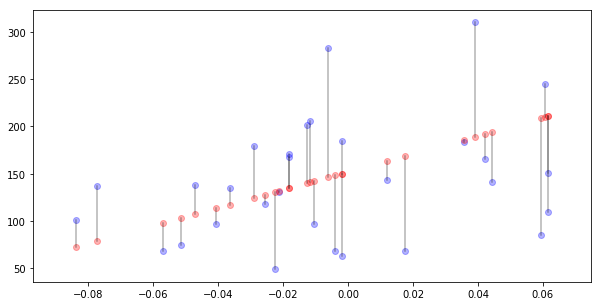

In [11]:
N_SAMPLES = 30
plt.scatter(X[:N_SAMPLES,0], y[:N_SAMPLES], alpha=0.3, c="blue")
plt.scatter(X[:N_SAMPLES,0], y_hat[:N_SAMPLES], alpha=0.3, c="red")
for i in range(N_SAMPLES):
    plt.plot([X[i, 0], X[i, 0]], [y[i], y_hat[i]], alpha=0.3, c="black")

We can take an average of these pointwise errors:

$$\frac{1}{N}\sum_i^N \left| y - \hat{y}_i\right|.$$

This error is called __Mean Absolute Error__.

However, for various reasons in many situations we prefer to square the distance before taking the sum. This is called __Mean Squared Error__ and we denote it by $MSE$. So

$$MSE(\hat{Y}) = \frac{1}{N}\sum_i^N \left(y_i - \hat{y}_i\right)^2$$

Now if we square we have something called __Root Mean Square Error__. This is something that could be interpratate as "average error" the same way we interpratate __standard deviation__ as average deviation.

$$RMSE(\hat{Y}) = \sqrt{\frac{1}{N}\sum_i^N \left(y_i - \hat{y}_i\right)^2}$$

__Why we prefer MSE?__ It depends on situtation. These are few important arguments for using MSE:

1. Square is a differentiable function and absolute value is not. This means that we can easily calculate gradients. This is crucial especially for Deep Learning.
2. It penalize a lot large error, since we square them. (this can be positive or not)

__Why sometimes not?__ 
1. MAE is more intuitive. It is just average error.
2. It does not penalize a lot large error so outliers have lower impact.

#### Python code
Let's calculate MAE, MSE and RMSE then.

In [23]:
N = len(y)
MAE = (1/N) * sum(np.abs(y-y_hat))
MSE = (1/N) * sum((y-y_hat)**2)
RMSE = MSE**0.5
print(MAE, MSE, RMSE)

51.79862763953365 3890.456585461273 62.37352471570989


### Is it good or bad?

So we could say that we sort of have average error of 62, which seems to OK since the outcome has mean around 150.

But, we should consider here how much data are spreaded. So the idea is to consider the mean of $Y$ as the simplest possible solution. Let's denote this mean by $\mu_Y$. That is

$$\mu_y = \frac{1}{N}\sum y_i.$$

Note then that for this prediction $\tilde{Y}$ ($\tilde{y_i} = \mu_Y$) Mean Square Error is equal to:

$$MSE(\tilde{Y})=\frac{1}{N}\sum ( y_i - \mu_Y)^2.$$

And this is simply the variance of $Y$, denoted by $D^2Y$. So we will compare $MSE$ with variance of $Y$ given by

$$D^2Y = \frac{1}{N}\sum ( y_i - \mu_Y)^2).$$

In order to compare $MSE(\hat{Y})$ and $D^2Y$ we take their difference and divide by the variance $D^2Y$. This is called $R^2$ score. This is then

$$R^2 = \frac{D^2Y - MSE(\hat{Y})}{D^2Y} = 1- \frac{MSE(\hat{Y})}{D^2Y}.$$

Note that if $\hat{y}$ is nothing better than $\mu_Y$ (that is $MSE(\hat{Y}) = D^2Y$) then 

$$R^2= 0.$$

On the other side, if $MSE(\hat{Y}) = 0$ (perfect prediction), then 

$$R^2=1$$

#### Python code

Let's do this in python.

In [24]:
muY = (1/N) * sum(y)
D2Y = (1/N) * sum((y - muY)**2)
R2 = 1 - MSE/D2Y
print(R2)

0.3439237602253802


#### Sklearn convinient function

Package `sklearn` has convinient functions that help calculate $MSE$ and $R^2$. Let's look at them. 

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y, y_hat), np.sqrt(mean_squared_error(y, y_hat))

(3890.4565854612724, 62.37352471570989)

In [15]:
r2_score(y, y_hat)

0.3439237602253803

### Cross Validation: Train Test split 

But... Do you remember why we train a model?  We train a model in order to predict values for data that we have not seen. 

Therefore, if we really want to estimate how good is our model we have to do this on data that the model has not seen before. For that we introduce __train-test splitting__. What is it? We take our data and randomly split them into two sets. First called __train set__ and second __test set__ or __validation set__.


#### Python code

Let's look how we could do it in python using. We are going to do 80%-20% train-test split.

Recall that we have `N` rows in our data dataset. Then first we take those `N` rows and suffle them. Next, we take first 80% to put them to train. Rest will go to test.

Here we will do this manually, but generally we use convinient function `train_test_split` 
from `sklearn.model_selection`.

In [16]:
p = .8 # Fraction of data that will go to train
np.random.seed(666)

# 1. Suffle indeces of rows
indices = np.arange(N)
np.random.shuffle(indices) 
print("First 10 shuffled indeces")
print(indices[:10])

# 2. How much data will go to test

N_train = int(p*N)
print("Test will contain {} rows.".format(N_train))

# 3. Split
indices_train = indices[:N_train]
indices_test = indices[N_train:]

X_train = X[indices_train, :]
y_train = y[indices_train]
X_test = X[indices_test, :]
y_test = y[indices_test]

First 10 shuffled indeces
[322 229 303 288 347 143 418 179   0 165]
Test will contain 353 rows.


__Question__ How large should be these sets? 

It depends. Tipically around 70%-90% of data goes to train and the rest goes to test/validation. But it depends. If you have really huge dataset and reasonably distributed than you can try use smaller test. For example, if you have 1,000,000 of photos of cats and dogs, and roughly 50% of them are cats and the rest are dogs, than you could easely use 99% for train and the rest for test. Test would still have 10,000 of photos.

__Question__ What do you mean by reasonably distributed?

Imagine that you have 1.000.000 of photos and only 0.01% of them are cats and the rest are dogs. This means that there is only 100 images of cats. It is definitelly not well distributed.

__Question__ Do you we always split randomly?

No. One example is prediction of the future behaviour of time series. In this situation we would rather split based on time. For example we could 20% of data that are the latest, and put them to test.

__Question__ Do we always split in two?

No. When we do _hyperparameter tunnig_ we should have three sets. Here we are not doing it now, so do not worry.


### Train on train, test on test

So now we are going to train our model only on test set. Then we will calculate predicted values for data from 
test and see how big is error. So we are going to execute the following steps:
1. Fit model on train data.
2. Calculate prediction on test.
3. Calculate MSE and R2 on test.

In [17]:
#1. Fit model on train data.
reg.fit(X_train, y_train)
#2. Calculate prediction on test.
y_test_hat = reg.predict(X_test)
#3. Calculate MSE and R2 on test.
print("On test: RMSE={}, R2={}".format(
    np.sqrt(mean_squared_error(y_test, y_test_hat)), 
    r2_score(y_test, y_test_hat)))

On test: RMSE=63.423019803292796, R2=0.33001184974053166


Let's compare it to performance on train.

In [18]:
y_train_hat = reg.predict(X_train)
print("On train: RMSE={}, R2={}".format(
    np.sqrt(mean_squared_error(y_train, y_train_hat)), 
    r2_score(y_train, y_train_hat)))

On train: RMSE=62.113146040462865, R2=0.34733760447310646


Model seems to perform slightly better on train (larger R2 score, smaller RMSE). However it does not seem that there is much difference. 

## All together now

Let us now execute the steps we we talking about at the beginig, in order to solve our main question __Does disease progression depend on dody mass index?__ Those steps are:

1. Prepare data
2. Split data into train and test.
3. Build a model
4. Fit model to train data.
5. Evaluate model on test data.

In [19]:
# 1. Prepare data
X = diabetes.data[:, [2]]
y = diabetes.target

# 2. Split data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3. Build a model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# 4. Fit model to train data.
reg.fit(X_train, y_train)

# 5. Evaluate model on test data.
from sklearn.metrics import mean_squared_error, r2_score
y_test_hat = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_hat)), r2_score(y_test, y_test_hat)

(61.76231592789759, 0.31971726180179383)

## Exercise 1: Boston dataset

In this exercise we will use Boston Dataset to answer the following question.

__Question__ Does meadian value of house depend on status of the population?

First let's load dataset.

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

__Step 1__ Use "DESCR" to find appropriate column that contains `percentage of lower status of the population`.

__Step 2__ Plot `percentage of lower status of the population` vs `Median value of owner-occupied homes`.

__Step 3__ Exectute 5 steps we have disscussed here. Is this model performs better than the model of disease progression we have disscused before?

__Step 4__ Plot real values vs. predicted one.

__Step 5__ Try repeat it with other variables. Are there other variables that performs better than `percentage of lower status of the population`. 

__Next__ In the next part we will explain what Multiple Linear Regression is, and how to choose best model if we have many of them.
See [Machine Learning Part 3: How to choose best multiple linear model]({% post_url 2019-02-16-How-to-choose-best-model %})


_Updated: 2019-02-15_